# Project : Mercedese-Benz Greener Manufacturing 

In [26]:
# Import necessary packages 

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings  
warnings.filterwarnings('ignore')

from sklearn import preprocessing

In [27]:
# Read Train and Test data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [28]:
train.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [29]:
train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [30]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)

Train Shape :  (4209, 378)
Test Shape :  (4209, 377)


In [33]:
# Check if there is any null value in Train data
train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [34]:
# Check the zero variance features 
zerovar_feature = []
for feature in train:
    if max(train[feature]) == min(train[feature]):
        print(feature)
        zerovar_feature.append(feature)
print(zerovar_feature)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [8]:
# If for any column(s), the variance is equal to zero, remove those variable(s).
#train.var(axis=0).head(10)
#train.var(axis=0) > 0

train.drop(train.var()[train.var() > 0].index.values, axis=1)

,X0,X1,X2,X3,X4,X5,X6,X8,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,k,v,at,a,d,u,j,o,0,0,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0
5,t,b,e,c,d,g,h,s,0,0,0,0,0,0,0,0,0,0,0,0
6,al,r,e,f,d,f,h,s,0,0,0,0,0,0,0,0,0,0,0,0
7,o,l,as,f,d,f,j,a,0,0,0,0,0,0,0,0,0,0,0,0
8,w,s,as,e,d,f,i,h,0,0,0,0,0,0,0,0,0,0,0,0
9,j,b,aq,c,d,f,a,e,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
print(train.y)

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
5        92.93
6       128.76
7        91.91
8       108.67
9       126.99
10      102.09
11       98.12
12       82.62
13       94.12
14       99.15
15       93.64
16      106.10
17      114.13
18       89.81
19       90.81
20       90.56
21       94.57
22      108.14
23      120.77
24       84.84
25       93.59
26      104.07
27       89.37
28       90.08
29      128.19
         ...  
4179     85.93
4180     90.45
4181     90.06
4182     90.38
4183     95.56
4184    109.00
4185    109.64
4186    131.98
4187     98.15
4188    102.33
4189    102.42
4190     89.11
4191     88.93
4192    103.03
4193    107.24
4194     91.13
4195     86.23
4196     99.93
4197     89.25
4198     97.09
4199     88.24
4200    108.59
4201    107.39
4202    123.34
4203     85.71
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64


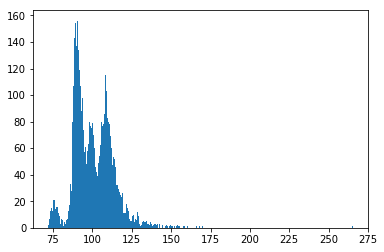

In [36]:
# To detect any outliers, y values are ploted.
plt.hist(train.y, bins = 300)
plt.show()

In [11]:
# Check the null value in any feature column in train set
for feature in train:
    if train[feature].isnull().sum() > 0 :
        print(train[feature])

In [12]:
# Check the null value in any feature column in test set
for feature in test:
    if test[feature].isnull().sum() > 0 :
        print(test[feature])

In [13]:
print(sum(train.isnull().values, 0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [14]:
print(sum(test.isnull().values, 0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [37]:
# Check the unique value in every feature column in train set
for column in train.columns:
    print(column)
    print(train[column].unique())
    print()

ID
[   0    6    7 ... 8412 8415 8417]

y
[130.81  88.53  76.26 ...  85.71 108.77  87.48]

X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']

X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']

X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']

X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']

X4
['d' 'b' 'c' 'a']

X5
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']

X6
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']

X8
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']

X10
[0 1]

X11
[0]

X

In [16]:
## Importing the data as some data-dimensions is lost on execution of the below  
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

df_train = train
df_test = test
print('Size of train set: {} rows and {} columns'.format(*df_train.shape))
print('Size of test set : {} rows and {} columns'.format(*df_test.shape))
print('Size of train set: {} rows and {} columns'.format(*train.shape))
print('Size of test set : {} rows and {} columns'.format(*test.shape))

Size of train set: 4209 rows and 378 columns
Size of test set : 4209 rows and 377 columns
Size of train set: 4209 rows and 378 columns
Size of test set : 4209 rows and 377 columns


In [17]:
# Outlier removal
train = train.loc[train['y'] < 170, :]

# seperating label and features
train_y = train['y']
train = train.drop('y', axis=1)

from sklearn.preprocessing import LabelEncoder

# label encoding the categorical features for dimension reduction
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

In [18]:
## **** Principal Component Analysis [PCA] ***
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(train)
pca2_results_test = pca.transform(test)

dim_reds = list()
train_pca = pd.DataFrame()
test_pca = pd.DataFrame()

## Multiple Analysis results to list()
for i in range(1, n_comp + 1):
    train_pca['pca_' + str(i)] = pca2_results_train[:, i - 1]
    test_pca['pca_' + str(i)] = pca2_results_test[:, i - 1]

In [19]:
train_pca.shape

(4208, 12)

In [20]:
test_pca.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12
0,-4205.500089,16.395861,13.630763,10.987925,-13.528819,-19.304659,6.717590,-1.621970,2.410903,1.402041,-0.525819,-1.622523
1,-4204.544020,-15.484363,-9.304810,-3.277414,-12.167708,-1.884763,0.906581,4.025849,1.994823,-0.420344,0.913304,0.310413
2,-4203.559045,12.739930,-4.123913,10.589703,3.726840,4.664174,-2.595748,-0.997856,0.487645,0.389143,0.058323,-0.936454
3,-4202.489529,14.423706,14.338755,0.316159,-6.226689,-26.207857,-3.988227,-2.536012,2.172712,-0.016570,-1.067269,-1.831161
4,-4201.489262,-12.161069,1.704583,12.975329,-2.594001,-25.353281,-1.511267,1.219026,-2.950836,-1.281744,0.214800,0.520281


# XGBoost Implementation

In [21]:
print('Size of df_train set: {} rows and {} columns'.format(*df_train.shape))
print('Size of df_test set : {} rows and {} columns'.format(*df_test.shape))
print('Size of train set: {} rows and {} columns'.format(*train.shape))
print('Size of test set : {} rows and {} columns'.format(*test.shape))

Size of df_train set: 4209 rows and 378 columns
Size of df_test set : 4209 rows and 377 columns
Size of train set: 4208 rows and 377 columns
Size of test set : 4209 rows and 377 columns


In [22]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print('Size of train set: {} rows and {} columns'.format(*df_train.shape))
print('Size of test set : {} rows and {} columns'.format(*df_test.shape))

#df_train = train
#df_test = test 

usable_columns = list(set(df_train.columns) - set(['ID', 'y']))

print("usable columns : ",usable_columns)

y_train = df_train['y'].values
id_test = df_test['ID'].values

print()
print("id test",id_test)

x_train = df_train[usable_columns]
x_test = df_test[usable_columns]

for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1) # Column with only one value is useless so we drop it
        x_test.drop(column, axis=1)
    if cardinality > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
        
x_train.head()

Size of train set: 4209 rows and 378 columns
Size of test set : 4209 rows and 377 columns
usable columns :  ['X344', 'X315', 'X333', 'X228', 'X283', 'X290', 'X328', 'X338', 'X142', 'X263', 'X302', 'X295', 'X45', 'X275', 'X270', 'X384', 'X247', 'X257', 'X87', 'X151', 'X260', 'X176', 'X212', 'X40', 'X281', 'X264', 'X219', 'X255', 'X321', 'X256', 'X4', 'X371', 'X138', 'X30', 'X227', 'X285', 'X174', 'X14', 'X349', 'X153', 'X327', 'X326', 'X206', 'X337', 'X258', 'X83', 'X309', 'X144', 'X140', 'X277', 'X86', 'X96', 'X369', 'X16', 'X78', 'X116', 'X129', 'X15', 'X57', 'X297', 'X175', 'X167', 'X203', 'X284', 'X65', 'X105', 'X92', 'X184', 'X310', 'X382', 'X97', 'X379', 'X306', 'X47', 'X101', 'X370', 'X107', 'X118', 'X148', 'X150', 'X287', 'X293', 'X77', 'X84', 'X213', 'X80', 'X51', 'X165', 'X202', 'X26', 'X268', 'X223', 'X91', 'X128', 'X366', 'X218', 'X351', 'X353', 'X43', 'X111', 'X152', 'X36', 'X178', 'X12', 'X220', 'X250', 'X373', 'X237', 'X357', 'X361', 'X221', 'X209', 'X141', 'X259', 'X182'

,X344,X315,X333,X228,X283,X290,X328,X338,X142,X263,...,X39,X231,X156,X93,X103,X53,X251,X131,X132,X246
0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [23]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[15:52:46] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.1397	valid-rmse:98.2538	train-r2:-58.3426	valid-r2:-67.6247
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.1832	valid-rmse:80.2714	train-r2:-38.7928	valid-r2:-44.804
[20]	train-rmse:66.541	valid-rmse:65.5967	train-r2:-25.7332	valid-r2:-29.5876
[30]	train-rmse:54.6149	valid-rmse:53.6305	train-r2:-17.0092	valid-r2:-19.4459
[40]	train-rmse:44.9172	valid-rmse:43.8842	train-r2:-11.1814	valid-r2:-12.6899
[50]	train-rmse:37.0508	valid-rmse:35.9587	train-r2:-7.28831	valid-r2:-8.19158
[60]	train-rmse:30.6913	valid-rmse:29.5289	train-r2:-4.68723	valid-r2:-5.19837
[70]	train-rmse:25.5745	valid-rmse:24.3337	train-r2:-2.949	valid-r2:-3.20918
[80]	train-rmse:21.4844	valid-rmse:20.1551	train-r2:-1.78687	valid-r2:-1.88769
[90

# Predict test values using xgboost

In [24]:
p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test
sub

,ID,y
0,1,89.319649
1,2,104.898849
2,3,89.684471
3,4,77.551781
4,5,111.189957
5,8,92.616425
6,10,110.918404
7,11,93.660889
8,12,115.803413
9,14,94.189919
